In [1]:
import numpy as np
from sklearn.datasets import make_regression

# Generate the data with the same parameters as in the image
x, y = make_regression(n_samples=4,
                       n_features=1,
                       n_informative=1,
                       n_targets=1,
                       noise=80,
                       random_state=13)

# Reshape y to be a 2D array, which is common for ML frameworks
y = y.reshape(-1, 1)

print("Feature data (X):")
print(x)
print("\nTarget data (y):")
print(y)

Feature data (X):
[[-0.71239066]
 [ 0.45181234]
 [-0.04450308]
 [ 0.75376638]]

Target data (y):
[[  7.21786552]
 [ 16.04609925]
 [-27.83756166]
 [144.36688189]]


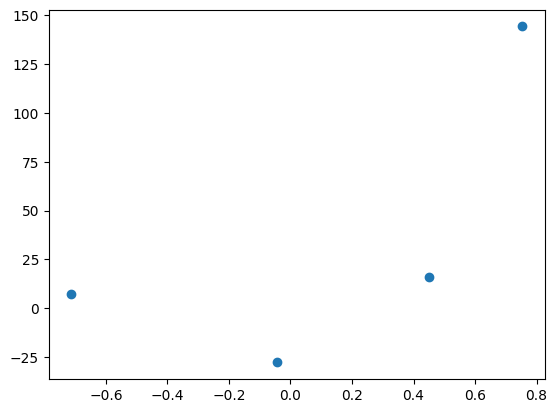

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [5]:
#first we apply linear regresssion using  old
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(x,y)

LinearRegression()

In [8]:
reg.coef_

array([[78.35063668]])

In [9]:
reg.intercept_

array([26.15963284])

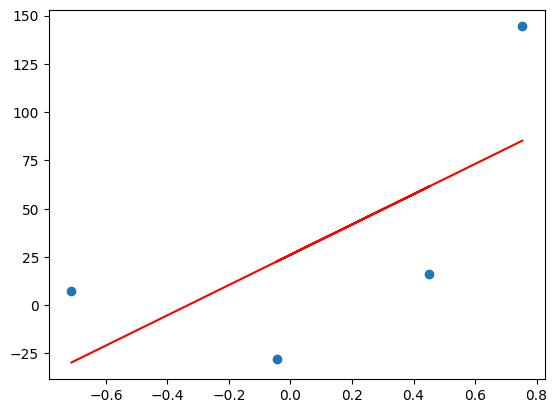

In [10]:
#now we try to predict out best fit line
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

# from here i start the gradient decent form taking the sope constant and a random value of b , like we start b =0  adn slope is  slope = reg.coef_



In [41]:
slope = reg.coef_
b=0
y_pred= ((slope*x)+b).reshape(4)

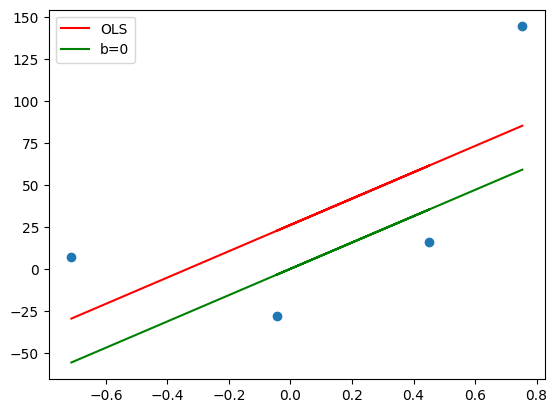

In [42]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [51]:
b=0
m =slope
loss_slope = -2 * np.sum(y - m*x - b)
loss_slope

np.float64(-209.27706274506096)

In [56]:
#now implemnt with learning rate and step size
lr= 0.1
step_size = loss_slope*lr
step_size

np.float64(-20.927706274506097)

In [57]:
b=b-step_size
b

np.float64(23.020476901956705)

In [58]:
y_pred1=((slope*x)+b).reshape(4)

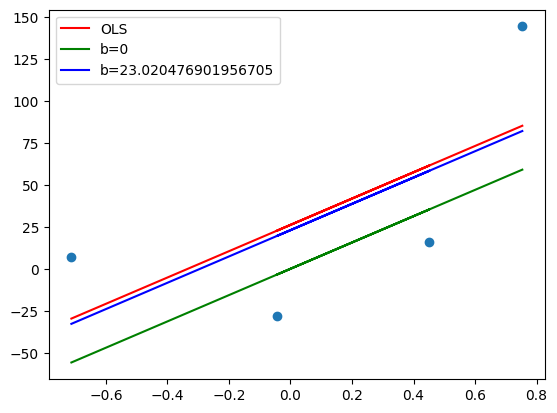

In [59]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='b=0')
plt.plot(x,y_pred1,color='blue',label='b={}'.format(b))
plt.legend()
plt.show()

In [60]:
#agian iteration
loss_slope=-2*np.sum(y-m*x-b)

In [61]:
step_size= loss_slope*lr
step_size

np.float64(-2.5113247529407334)

In [62]:
b=b-step_size
b

np.float64(25.53180165489744)

In [63]:
y_pred2= ((slope*x)+b).reshape(4)

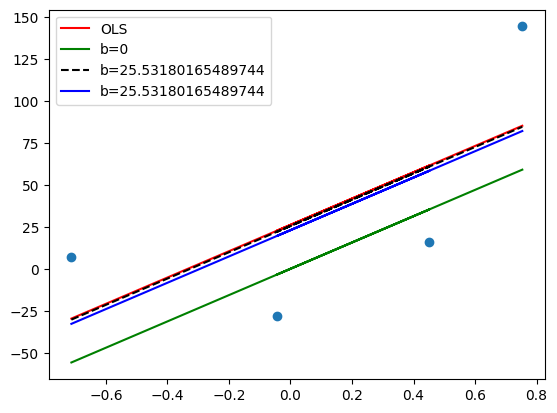

In [68]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='b=0')
plt.plot(x,y_pred2,color='black',label='b={}'.format(b),linestyle='--')
plt.plot(x,y_pred1,color='blue',label='b={}'.format(b))
plt.legend()
plt.show()

In [69]:
#agin iteration
loss_slope=-2*np.sum(y-m*x-b)
step_size= loss_slope*lr
step_size

np.float64(-0.5022649505881475)

In [70]:
b=b-step_size
b

np.float64(26.034066605485588)

In [71]:
y_pred3= ((slope*x)+b).reshape(4)

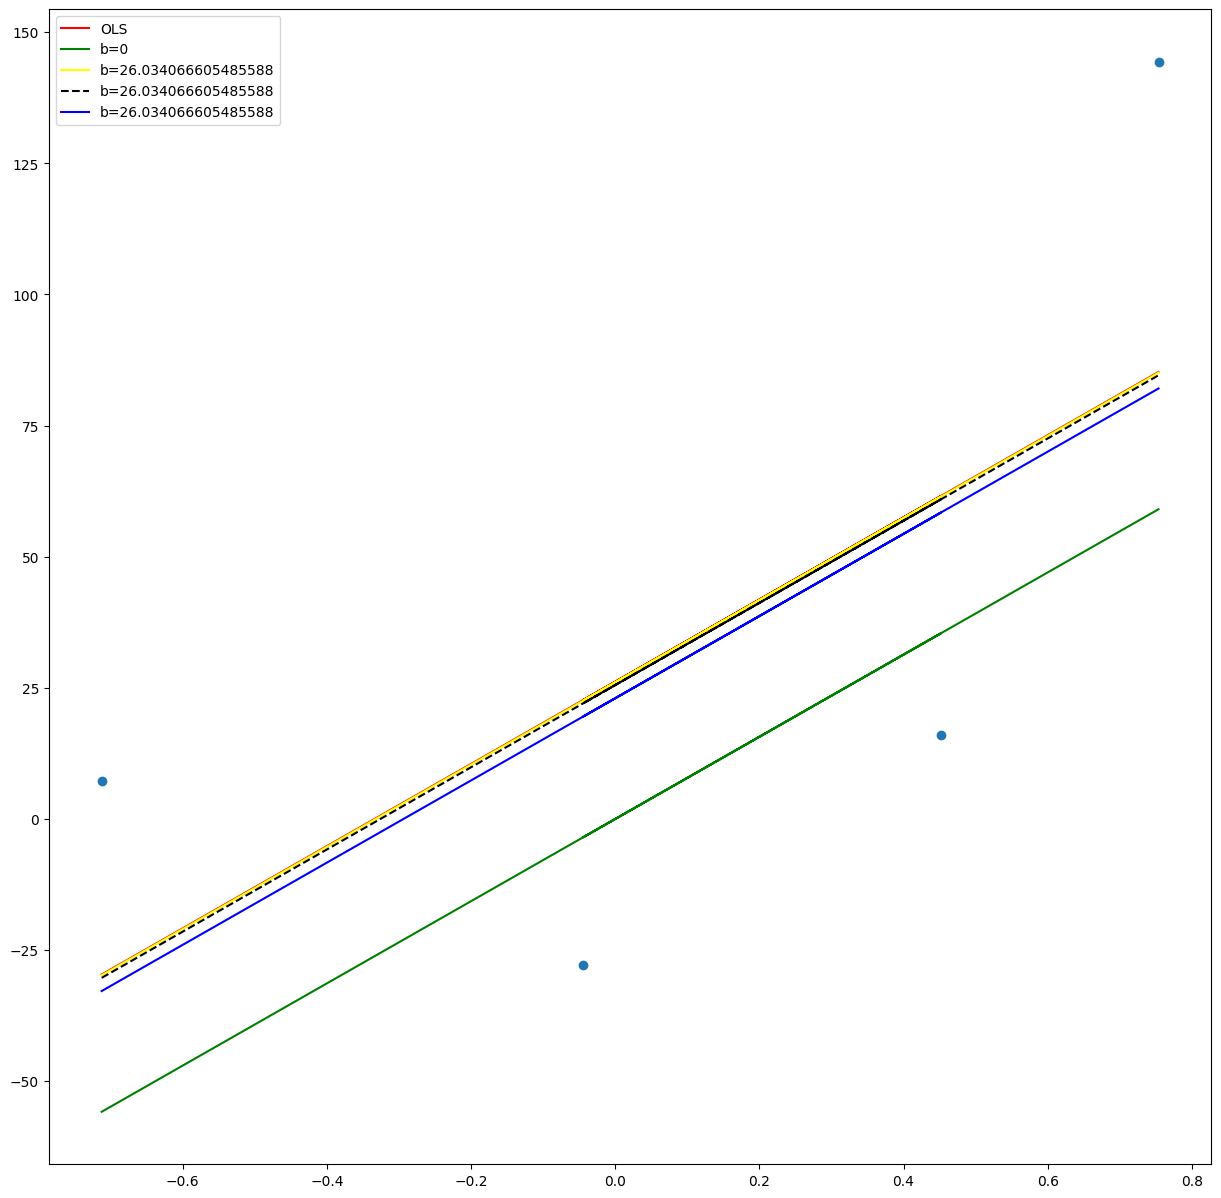

In [80]:
plt.figure(figsize=(15,15))
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='b=0')
plt.plot(x,y_pred3,color='yellow',label='b={}'.format(b))
plt.plot(x,y_pred2,color='black',label='b={}'.format(b),linestyle='--')
plt.plot(x,y_pred1,color='blue',label='b={}'.format(b))
plt.legend()
plt.show()

this is too tought to maintain the whole thing so we done this task using a loop

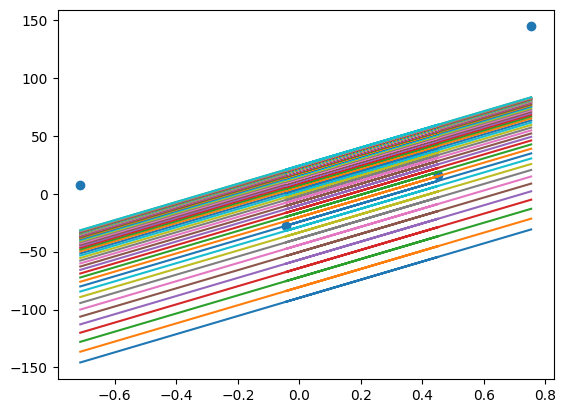

In [83]:
b=-100
m=slope
lr=0.01

for i in range(50):
  loss_slope = -2*np.sum(y-m*x-b)
  b= b-(lr*loss_slope)
  y_pred = m*x+b
  plt.plot(x,y_pred)
plt.scatter(x,y)